# 1. Selecionando as estações pluviométricas

In [24]:
# Importar as bibliotecas:

import hydrobr
import geopandas as gpd
from shapely.geometry import Point

<AxesSubplot:>

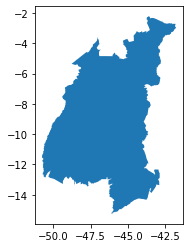

In [26]:
# Abrir o shapefile da área de interesse e plotar:

area = gpd.read_file("/home/silviane/anaconda3/envs/dados_ana/shapefiles_matopiba/Matopiba_Perimetro.shp")
area.plot()

In [16]:
# Obter o inventário das estações da ANA. Para isso a biblioteca HydroBR conta com duas funções específicas:
# 1º) hydrobr.get_data.ANA.list_prec_stations - Para obter a lista de estações de precipitação
# 2º) hydrobr.get_data.ANA.list_flow_stations - Para obter a lista de estações de vazão/nível

lista_plu = hydrobr.get_data.ANA.list_prec_stations()

# .info para visualizar os dados:
lista_plu.info()

# ------------------------------------------------------
# Exemplos de descrição das colunas:
# ------------------------------------------------------
# Data da primeira medição (Coluna 9 - StartDate)
# Data da última medição (Coluna 10 - EndDate)
# Número de anos com dados (Coluna 11 - NYD)
# Porcentagem de falhas entre a primeira e última medição (Coluna 12 - MD)
# Número de anos sem nenhuma falha (Coluna 13 - N_YWOMD)
# Porcentagem de anos com falhas(Coluna 14 - YWMD)
# OBS.: Atualização a cada 6 meses.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         11976 non-null  object 
 1   Code         11976 non-null  object 
 2   Type         11976 non-null  int64  
 3   SubBasin     11976 non-null  int64  
 4   City         11975 non-null  object 
 5   State        11976 non-null  object 
 6   Responsible  11976 non-null  object 
 7   Latitude     11976 non-null  float64
 8   Longitude    11976 non-null  float64
 9   StartDate    11976 non-null  object 
 10  EndDate      11976 non-null  object 
 11  NYD          11976 non-null  int64  
 12  MD           11976 non-null  float64
 13  N_YWOMD      11976 non-null  int64  
 14  YWMD         11976 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.4+ MB


In [110]:
# Georreferenciar as informações do inventário armazenadas na variável lista_plu.
# Criar uma geometria de pontos utilizando as informações de Latitude e Longitude com o auxílio da função Point():

pontos = [Point(x) for x in zip(lista_plu.Longitude, lista_plu.Latitude)]

In [111]:
# Definindo o sistema de coordenadas:

crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True} 

In [112]:
# Criando o geodataframe:

lista_plu_geo = gpd.GeoDataFrame(lista_plu, geometry=pontos, crs=crs)

<AxesSubplot:>

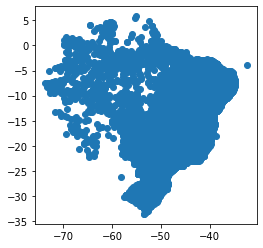

In [113]:
# Estações pluviométricas de todo o país:

lista_plu_geo.plot()

In [114]:
# Agora que temos a área de interesse e o inventário de estações georreferenciados, 
# podemos filtrar apenas as estações que estão inseridas na área, utilizando a 
# operação espacial .within, que identifica se uma geometria de ponto está localizada 
# dentro de uma geometria poligonal.

In [115]:
# Selecionando os indices das estações que estão dentro da bacia:

indices = lista_plu_geo.geometry.within(area.geometry[0])

In [116]:
# Filtrando as estações:

lista_selecionada = lista_plu_geo[indices]

In [117]:
#Obtendo as informações:

lista_selecionada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 537 entries, 201 to 4902
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         537 non-null    object  
 1   Code         537 non-null    object  
 2   Type         537 non-null    int64   
 3   SubBasin     537 non-null    int64   
 4   City         537 non-null    object  
 5   State        537 non-null    object  
 6   Responsible  537 non-null    object  
 7   Latitude     537 non-null    float64 
 8   Longitude    537 non-null    float64 
 9   StartDate    537 non-null    object  
 10  EndDate      537 non-null    object  
 11  NYD          537 non-null    int64   
 12  MD           537 non-null    float64 
 13  N_YWOMD      537 non-null    int64   
 14  YWMD         537 non-null    float64 
 15  geometry     537 non-null    geometry
dtypes: float64(4), geometry(1), int64(4), object(7)
memory usage: 71.3+ KB


<AxesSubplot:>

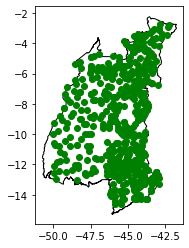

In [119]:
base = area.plot(color='white', edgecolor='black')
lista_selecionada.plot(ax=base,marker='o',color='green')

# 2. Fazendo o download dos dados das estações selecionadas.

In [120]:
# Após obter o inventário das estações pluviométricas de todo o país e filtrar apenas as estações da região de interesse 
# na variável "lista_selecionada". O próximo passo é fazer o download dos dados diários a partir dos códigos dessas estações.

# A biblioteca HydroBR conta com três funções específicas para o download dos dados diários das estações de monitoramento da ANA:
# 1º) hydrobr.get_data.ANA.prec_data -> Para obter os dados de precipitação a partir de uma lista de códigos de estações de precipitação;
# 2º) hydrobr.get_data.ANA.flow_data -> Para obter os dados de vazão a partir de uma lista de códigos de estações de vazão/nível;
# 3º) hydrobr.get_data.ANA.stage_data -> Para obter os dados de nível a partir de uma lista de códigos de estações de vazão/nível;

# Neste exemplo, a lista refere-se apenas as estações pluviométricas. Para isso iremos transformar a coluna Code, 
# que armazena os códigos das estações, em uma lista do python.

In [121]:
# Selecionando os códigos das estações:

codigos = lista_selecionada.Code.to_list()

In [122]:
# Baixando as estações:

dados_plu = hydrobr.get_data.ANA.prec_data(codigos)

100%|██████████| 537/537 [41:44<00:00,  4.66s/it] 


In [123]:
# Informações: Resultou em 537 estações pluviométricas.
dados_plu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40086 entries, 1911-06-01 to 2021-02-28
Freq: D
Columns: 537 entries, 00242000 to 01446008
dtypes: float64(537)
memory usage: 165.5 MB


# 3. Visualizando a disponibilidade temporal dos dados

In [125]:
# Os dados das estações selecionadas foram armazenados na variável "dados_plu".

# Através da função .info vimos que temos 537 colunas com códigos que variam entre 00242000 até 01446008.

# A frequência diária está entre o dia 01/06/1911 e 28/02/2021. No entanto, sabemos que nem todas as estações possuem 
# registros em todos esses dias. Uma ótima forma de visualizar temporalmente a disponibilidade desses dados é utilizando 
# o gráfico de Gantt. 

# A função hydrobr.Plot pode nos auxiliar nisso, nos fornecendo uma fig no formato plotly, o que nos leva a necessidade de 
# usar a biblioteca plotly. Importaremos a função plot, que salva o nosso gráfico num arquivo .html. Que é um formato iterativo.

In [130]:
from plotly.offline import plot
gantt_fig = hydrobr.Plot.gantt(dados_plu)

Station 00545002 has no months with significant data
Station 01247008 has no months with significant data
Station 01344022 has no months with significant data


In [131]:
#Atualizando o layout da figura:

gantt_fig.update_layout(
    autosize = False,
    width = 1800, #Determina a largura da figura em pixels
    height = 1500, #Determina a altura da figura em pixels
    xaxis_title = 'Ano', #Título do eixo 
    yaxis_title = 'Código da Estação', #Título do eixo y.
    font = dict(family="Courier New, monospace", size=12))

In [134]:
#Plotando:

plot(gantt_fig,filename='Gantt - Plu' + '.html')

'Gantt - Plu.html'

# 4. Exportando os Dados

In [132]:
# Exportar para o formato .csv
# Selecionando os códigos das estações:

dados_plu.to_csv('dados_pluviometricos_matopiba.csv', sep=';')

# Conclusão

In [133]:
# Resumo:
# Utilização da biblioteca HydroBR com o foco nos dados da Agência Nacional de Água;
# Realização dos seguintes procedimentos:
    # Seleção de estações a partir de um shapefile;
    # Realização do download dos dados das estações a partir de uma lista de códigos;
    # Visualização da disponibilidade temporal dos dados;
    # Exportação dos dados para o formato .csv.
